# King Danger Analysis

This notebook processes the analysis_results.csv file to add king danger metrics for each chess position.

In [2]:
import pandas as pd
import chess
import sys
import os

from common.board_information import king_danger

In [3]:
# Load the analysis results CSV file
df = pd.read_csv('model_research/results/analysis_results.csv')

# Display the first few rows to understand the structure
df.head()

,move_num,complexity,win_prob,efficient_mobility,narrowness,piece_activity,game_phase,actual_move,position_fen,opening_rank,midgame_rank,endgame_rank,tactics_rank,defensive_tactics_rank
0,66,33.193600,0.020961,50.000000,9.404000,21.267546,midgame,Rd1,6k1/5pp1/1rn4p/1b6/p2b4/5PP1/PP3RBP/4R1K1 w - ...,10,10,8,10,6
1,54,4.936585,99.917745,0.000000,31.344004,6.114939,midgame,Qb7,3qr1k1/Q4pp1/1pnb3p/1b6/p3P3/4BPP1/PP3RBP/3R2K...,10,2,2,3,3
2,40,96.014634,93.938829,33.333333,9.584609,20.121544,midgame,Nb5,r2qr1k1/1bpn1pp1/1p1b3p/8/p1QPP3/2N1BPP1/PP4BP...,10,5,10,4,10
3,16,64.009756,93.274432,43.750000,11.738701,16.429172,opening,g3,rn1qkb1r/p1p2ppp/1p6/5b2/8/1QN5/PP1PPPPP/R1B1K...,2,4,3,6,10
4,32,84.012805,93.868152,48.571429,10.246378,18.821981,midgame,e4,r2qr1k1/p1pn1ppp/1pbb4/8/3P4/1QN1PPP1/PP4BP/R1...,6,4,10,8,10


In [4]:
# Function to calculate king danger for both sides
def calculate_king_danger(row):
    # Create a chess board from the FEN position
    fen = row['position_fen']
    board = chess.Board(fen)
    phase = row['game_phase']
    
    # Calculate king danger for the current turn (self)
    self_king_danger = king_danger(board, board.turn, phase)
    
    # Calculate king danger for the opponent (not current turn)
    opp_king_danger = king_danger(board, not board.turn, phase)
    
    return pd.Series({
        'self_king_danger': self_king_danger,
        'opp_king_danger': opp_king_danger
    })

In [5]:
# Apply the function to each row in the dataframe
# This may take some time for large datasets
print(f"Processing {len(df)} positions...")

# Add a try-except block to handle any errors
king_danger_results = []
for idx, row in df.iterrows():
    try:
        result = calculate_king_danger(row)
        king_danger_results.append(result)
        
        # Print progress every 1000 rows
        if (idx + 1) % 1000 == 0:
            print(f"Processed {idx + 1} positions")
    except Exception as e:
        print(f"Error processing row {idx}: {e}")
        # Add null values for rows with errors
        king_danger_results.append(pd.Series({
            'self_king_danger': None,
            'opp_king_danger': None
        }))

# Combine the results with the original dataframe
king_danger_df = pd.DataFrame(king_danger_results)
df = pd.concat([df, king_danger_df], axis=1)

print("Processing complete!")

Processing 15354 positions...
Processed 1000 positions
Processed 2000 positions
Processed 3000 positions
Processed 4000 positions
Processed 5000 positions
Processed 6000 positions
Processed 7000 positions
Processed 8000 positions
Processed 9000 positions
Processed 10000 positions
Processed 11000 positions
Processed 12000 positions
Processed 13000 positions
Processed 14000 positions
Processed 15000 positions
Processing complete!


In [6]:
# Display the first few rows of the updated dataframe
df.head()

,move_num,complexity,win_prob,efficient_mobility,narrowness,piece_activity,game_phase,actual_move,position_fen,opening_rank,midgame_rank,endgame_rank,tactics_rank,defensive_tactics_rank,self_king_danger,opp_king_danger
0,66,33.193600,0.020961,50.000000,9.404000,21.267546,midgame,Rd1,6k1/5pp1/1rn4p/1b6/p2b4/5PP1/PP3RBP/4R1K1 w - ...,10,10,8,10,6,-565.666667,-113.500000
1,54,4.936585,99.917745,0.000000,31.344004,6.114939,midgame,Qb7,3qr1k1/Q4pp1/1pnb3p/1b6/p3P3/4BPP1/PP3RBP/3R2K...,10,2,2,3,3,-199.833333,-201.166667
2,40,96.014634,93.938829,33.333333,9.584609,20.121544,midgame,Nb5,r2qr1k1/1bpn1pp1/1p1b3p/8/p1QPP3/2N1BPP1/PP4BP...,10,5,10,4,10,-468.833333,-226.166667
3,16,64.009756,93.274432,43.750000,11.738701,16.429172,opening,g3,rn1qkb1r/p1p2ppp/1p6/5b2/8/1QN5/PP1PPPPP/R1B1K...,2,4,3,6,10,-402.000000,29.333333
4,32,84.012805,93.868152,48.571429,10.246378,18.821981,midgame,e4,r2qr1k1/p1pn1ppp/1pbb4/8/3P4/1QN1PPP1/PP4BP/R1...,6,4,10,8,10,-53.166667,-299.333333


In [7]:
# Basic statistics of the king danger values
print("Statistics for self_king_danger:")
print(df['self_king_danger'].describe())
print("\nStatistics for opp_king_danger:")
print(df['opp_king_danger'].describe())

Statistics for self_king_danger:
count    15354.000000
mean      -369.255037
std        592.333730
min      -2016.666667
25%       -771.833333
50%       -450.500000
75%        -52.166667
max       3367.166667
Name: self_king_danger, dtype: float64

Statistics for opp_king_danger:
count    15354.000000
mean      -369.980830
std        580.986759
min      -1713.333333
25%       -790.666667
50%       -444.833333
75%        -55.000000
max       4132.333333
Name: opp_king_danger, dtype: float64


In [8]:
# Save the enriched data to a new CSV file
output_file = 'model_research/results/analysis_results_with_king_danger.csv'
df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")

Data saved to model_research/results/analysis_results_with_king_danger.csv


## Visualisation of King Danger Distribution

FileNotFoundError: [Errno 2] No such file or directory: '/model_research/results/king_danger_distribution.png'

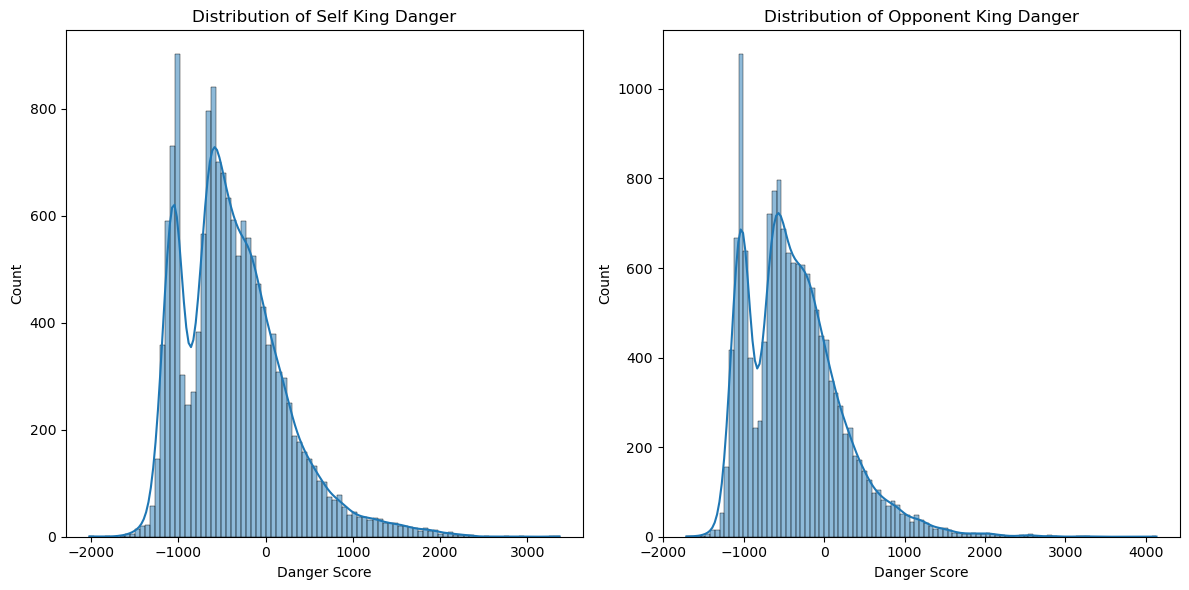

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot histograms of king danger values
plt.subplot(1, 2, 1)
sns.histplot(df['self_king_danger'].dropna(), kde=True)
plt.title('Distribution of Self King Danger')
plt.xlabel('Danger Score')

plt.subplot(1, 2, 2)
sns.histplot(df['opp_king_danger'].dropna(), kde=True)
plt.title('Distribution of Opponent King Danger')
plt.xlabel('Danger Score')

plt.tight_layout()
plt.savefig('/model_research/results/king_danger_distribution.png')
plt.show()

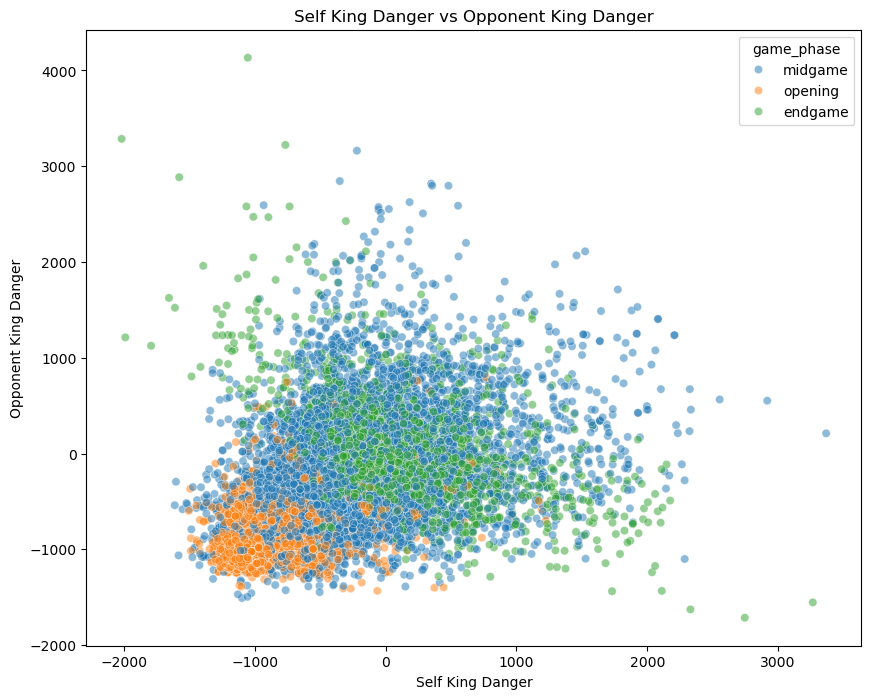

In [11]:
# Scatter plot of self vs opponent king danger
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='self_king_danger', y='opp_king_danger', alpha=0.5, hue='game_phase')
plt.title('Self King Danger vs Opponent King Danger')
plt.xlabel('Self King Danger')
plt.ylabel('Opponent King Danger')
plt.savefig('model_research/results/king_danger_scatter.png')
plt.show()

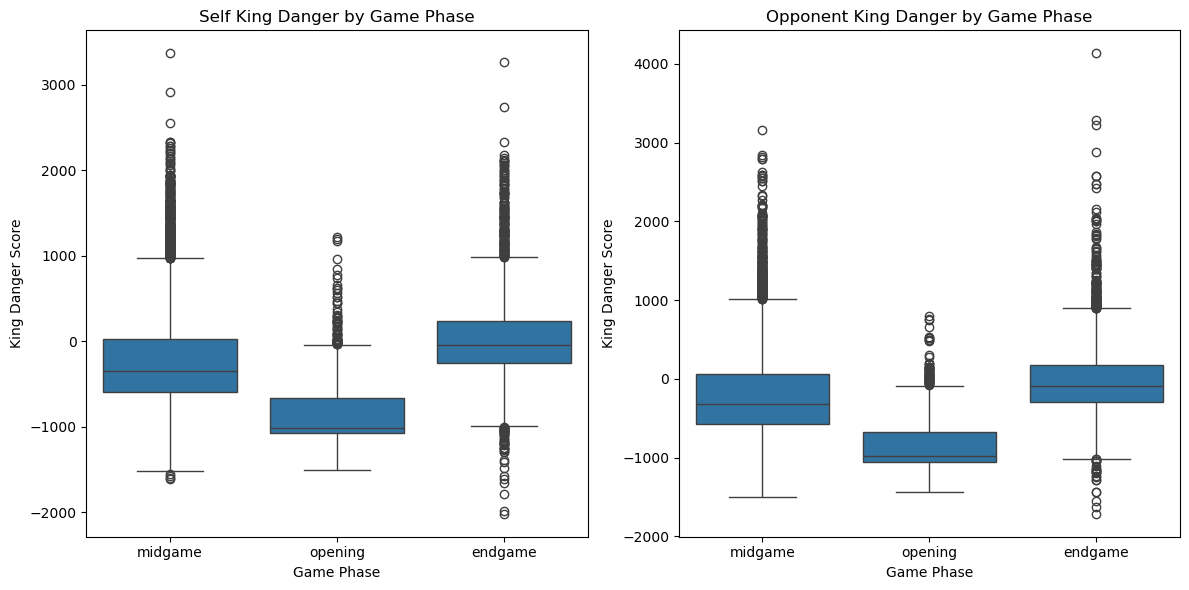

In [12]:
# King danger by game phase
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='game_phase', y='self_king_danger')
plt.title('Self King Danger by Game Phase')
plt.xlabel('Game Phase')
plt.ylabel('King Danger Score')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='game_phase', y='opp_king_danger')
plt.title('Opponent King Danger by Game Phase')
plt.xlabel('Game Phase')
plt.ylabel('King Danger Score')

plt.tight_layout()
plt.savefig('model_research/results/king_danger_by_phase.png')
plt.show()